In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
% matplotlib inline


# 第一部分： python 的numpy 基础
### 1- 用numpy 创建基础方法


In [2]:
def sigmoid(x):
    """
    计算x的sigmoid
    
    参数：
    x 是一个值 或者一个数列
    
    返回：
     s -- simoid(x)
     
    """
    s = 1.0/(1+1/np.exp(x))
    return s

In [3]:
# 测试当x是一个值或者一个数列时候不同结果
print('x is a number of 3',sigmoid(3))
print('x is a array of [1,2,3]',sigmoid(np.array([1,2,3])))

x is a number of 3 0.9525741268224334
x is a array of [1,2,3] [0.73105858 0.88079708 0.95257413]


### 1.2 编写sigmoid_derivative方法实现sigmoid 梯度计算

我们之前做过推导 sigmoid 的求导是 s(1-s) 推导过程：
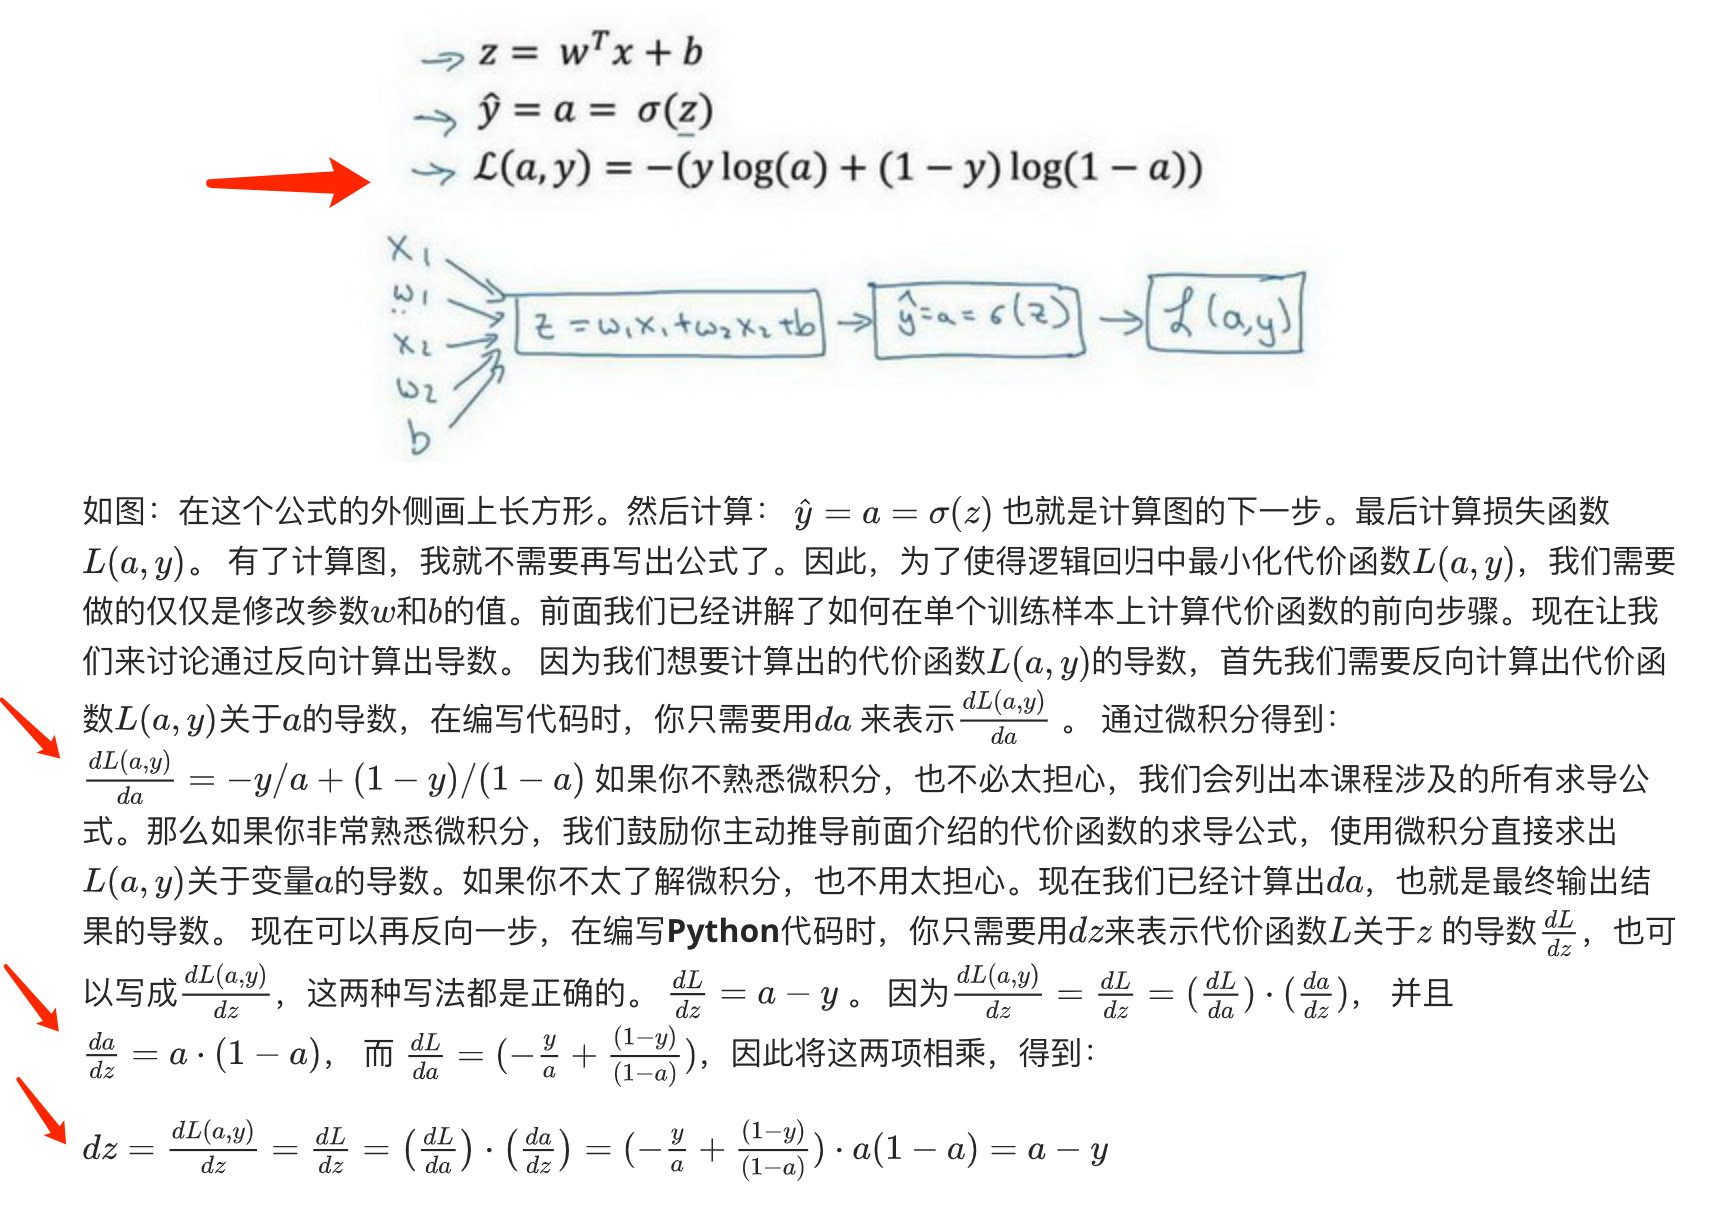
补充一下sigmoid中对z的求导a*(1-a)的推导过程：


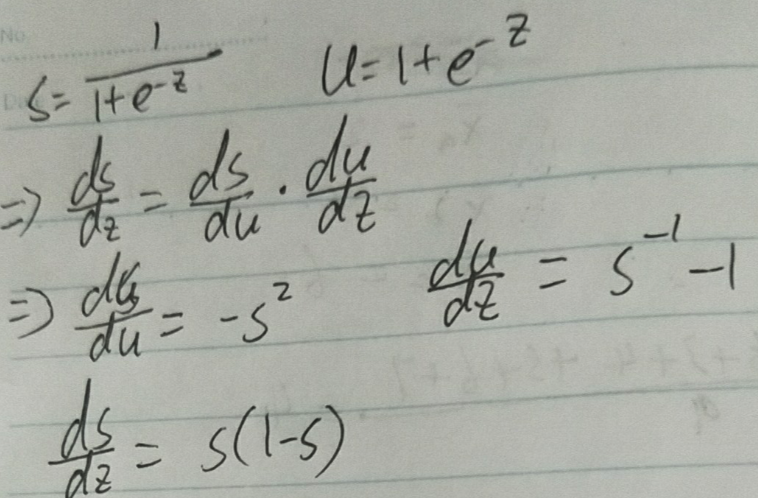

In [4]:
#由上面公式得出对sigmoid求导
def sigmoid_derivative(x):
    s = 1/(1+1/np.exp(x))
    ds = s*(1-s)
    return ds


- 引入猫的图片开始练习矩阵的形状处理 ，这个图形其实可以理解成一个魔方
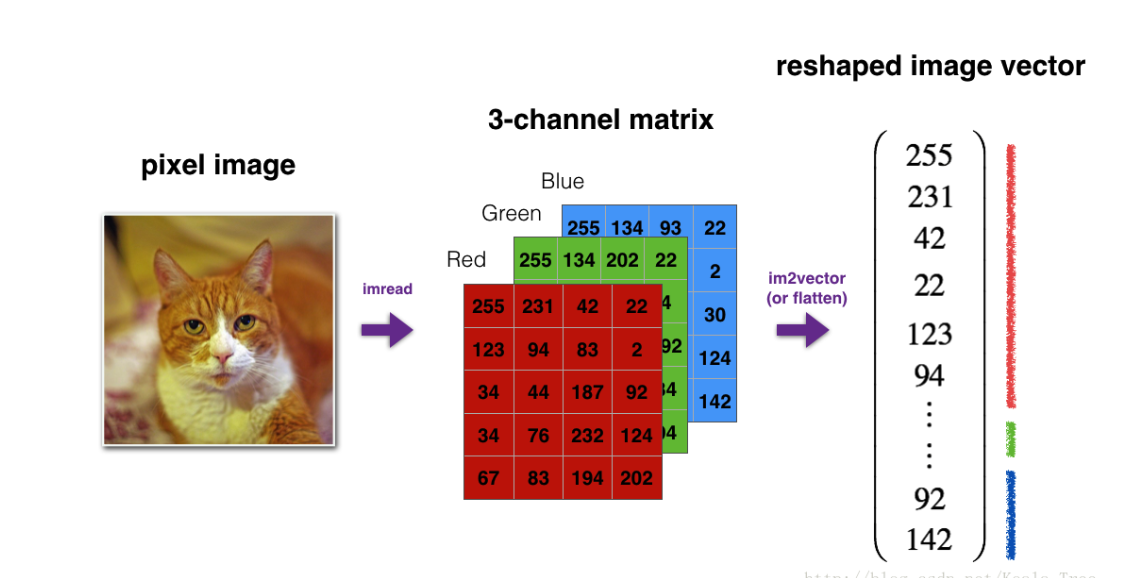

In [5]:
def image2vector(image):
    """
    把一个m*n*z 的图形矩阵变成 m*n*z 行 1列的矩阵
    """
    v = image.reshape((image.shape[0]*image.shape[1]*image.shape[2]),1)
    return v

In [6]:
#这是一个3*3*2的矩阵
image = np.array([[[ 0.67826139,  0.29380381],
        [ 0.90714982,  0.52835647],
        [ 0.4215251 ,  0.45017551]],

       [[ 0.92814219,  0.96677647],
        [ 0.85304703,  0.52351845],
        [ 0.19981397,  0.27417313]],

       [[ 0.60659855,  0.00533165],
        [ 0.10820313,  0.49978937],
        [ 0.34144279,  0.94630077]]])

print ("image2vector(image) = " + str(image2vector(image)))


image2vector(image) = [[0.67826139]
 [0.29380381]
 [0.90714982]
 [0.52835647]
 [0.4215251 ]
 [0.45017551]
 [0.92814219]
 [0.96677647]
 [0.85304703]
 [0.52351845]
 [0.19981397]
 [0.27417313]
 [0.60659855]
 [0.00533165]
 [0.10820313]
 [0.49978937]
 [0.34144279]
 [0.94630077]]


### 1.4 规范行
规范化就是矩阵除以矩阵的莫(范数)，为了让梯度下降更快  例如矩阵$$A = \left[
 \begin{matrix}
  1 & 2&4\\
   3& 3&1 
  \end{matrix} \right] $$的横向模(范数)= $$\left[
 \begin{matrix}\sqrt{(1^2+2^2+4^2)}\\
 \sqrt{(3^2+3^2+1^2)}\end{matrix} \right]$$

In [7]:

def normalizeRows(x):
    #求出范数矩阵
    x_norm = np.linalg.norm(x, axis=1, keepdims = True)
    #值除以范数
    x = x / x_norm  
   
    return x


In [8]:
#实验一下：结果无误
x = np.array([
    [0, 3, 4],
    [1, 6, 4]])
print("normalizeRows(x) = " + str(normalizeRows(x)))

normalizeRows(x) = [[0.         0.6        0.8       ]
 [0.13736056 0.82416338 0.54944226]]


### 广播和softmax功能
- 练习：使用numpy 实现softmax函数，你可以将softmax视为当你的算法需要更多类进行分类时使用的规范化函数

In [14]:
def softmax(x):
    """
    计算输入x的每一行的softmax。

    您的代码应该适用于行向量和形状矩阵(n, m)。

    提要:
    x——形状的numpy矩阵(n,m)

    返回:
    s——一个numpy矩阵，它等于(n,m)的softmax (x)
    """

    #e的指数
    x_exp = np.exp(x) 

    #e的指数求和（这是个n*1）的矩阵
    x_sum = np.sum(x_exp, axis = 1, keepdims = True) 
    s = x_exp / x_sum 
    return s


In [15]:
#实验一下：结果无误
x = np.array([
    [0, 3, 4],
    [1, 6, 4]])
softmax(x)

array([[0.01321289, 0.26538793, 0.72139918],
       [0.00589975, 0.8756006 , 0.11849965]])

### 矢量化
在深度学习中，处理非常大数据集，确保代码具有计算效率所以需要使用矢量化

下面实现L1 L2的损失函数

In [16]:
def L1(yhat,y):
    loss = np.sum(np.abs(y-yhat))
    return loss

In [17]:
def L2(yhat, y):
    loss =np.sum(np.power((y - yhat), 2))
    return loss
